# **Actividad 3 - Análisis del proceso de ML no supervisado de clasificación**

**Estudiante:** David Alejandro Narváez Mejia

**Fecha:** 16/05/2025

**Materia:** Aprenizaje Automatico - MIAR0525

**Profesor:** Gladys Villegas R. PhD(C)

**Referencias:**

[1] https://www.kaggle.com/datasets/hrhuynguyen/2d-spatial-dataset/data

[2] Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (3rd ed.). O'Reilly Media.

In [108]:
# ============================================================
# Instalacion de librerias para procesamiento de datos y EDA
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
# Cargar el dataset
# Use the raw content URL instead
df = pd.read_csv('https://github.com/DAVOALEJO1987/CLUSTERING-K-MEANS-DBSCAN/raw/de2b9083f21af643c42bcb3737d8d365df716b99/Basel_Weather.csv')


Valores
       DATE  MONTH  cloud_cover  global_radiation  precipitation  sunshine  \
0  20000101      1            7              0.82           1.34       0.0   
1  20000102      1            5              0.60           0.39       2.8   
2  20000103      1            3              0.81           0.00       5.1   
3  20000104      1            1              1.05           0.11       8.7   
4  20000105      1            4              0.69           0.17       3.4   

   temp_mean  temp_min  temp_max  humidity humidity_class  
0      -15.2     -17.0     -13.4      0.89            Mid  
1      -13.7     -15.0     -12.3      0.86            Low  
2       -9.2     -12.5      -5.8      0.41            Low  
3       -5.6      -7.0      -4.2      0.25            Low  
4       -7.6      -9.4      -5.8      0.77            Low  

Valores nulos por columna:
DATE                0
MONTH               0
cloud_cover         0
global_radiation    0
precipitation       0
sunshine            0
te

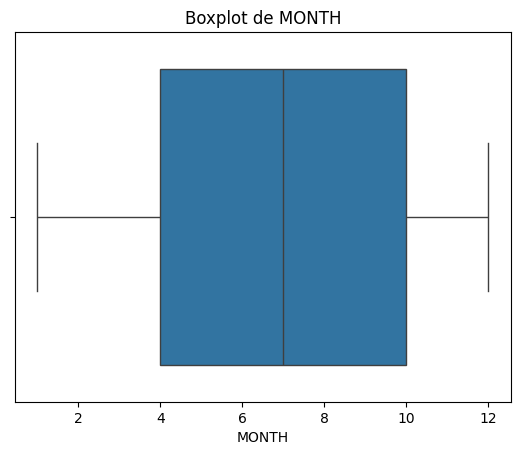

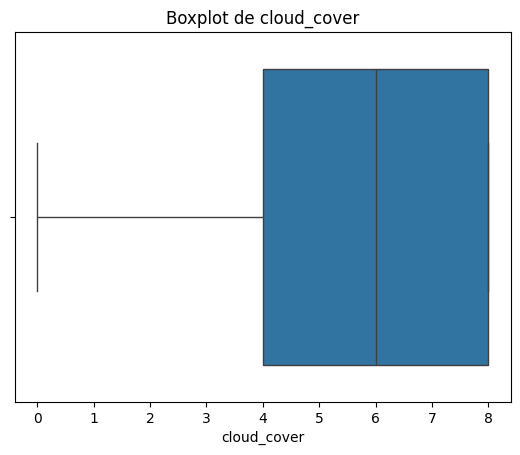

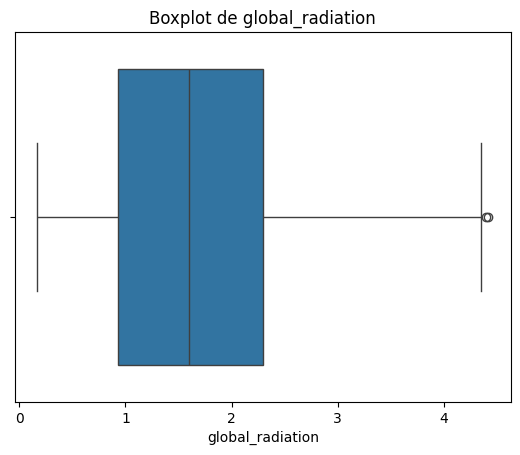

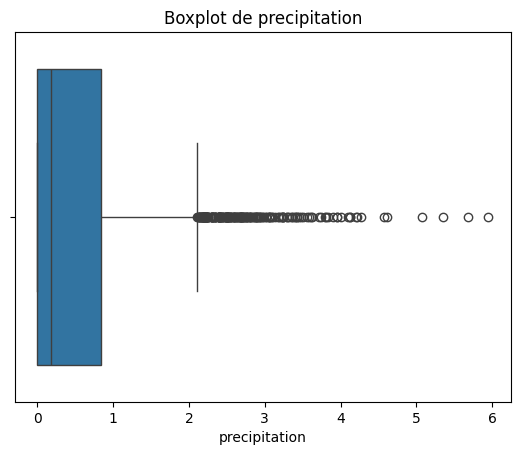

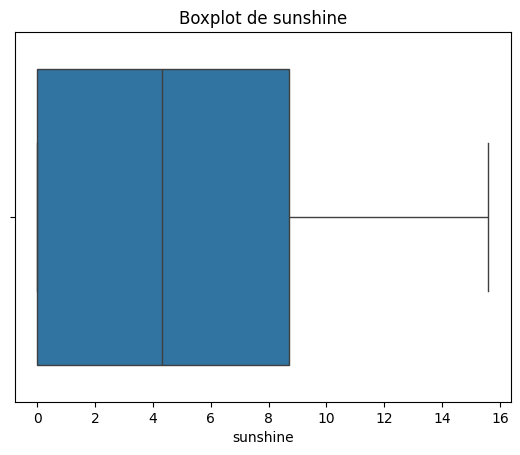

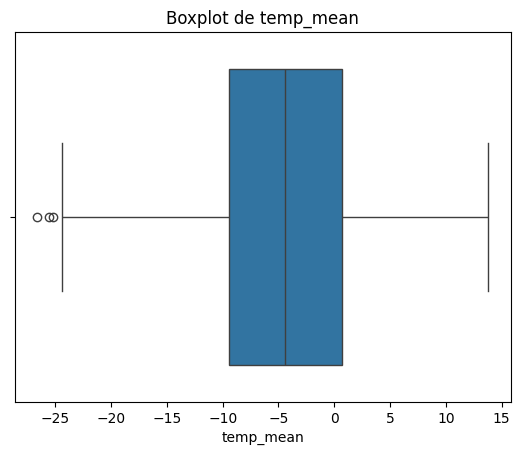

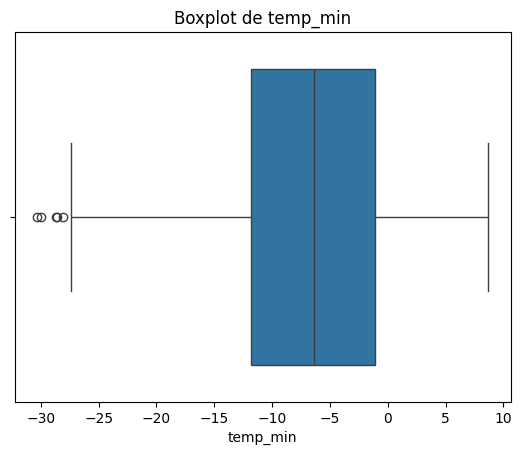

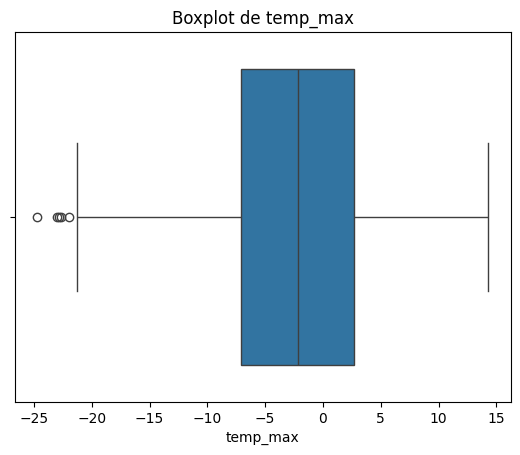

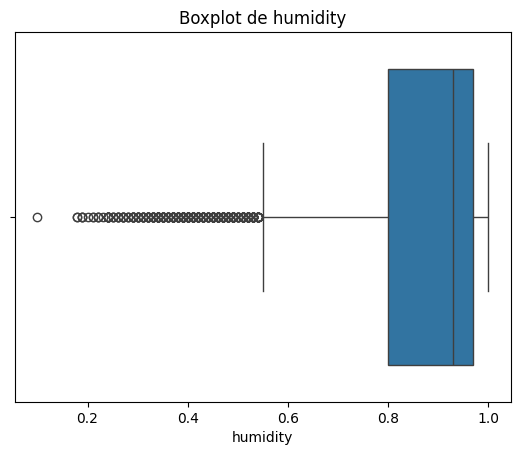


Resumen estadístico:
                                DATE        MONTH  cloud_cover  \
count                           3654  3654.000000  3654.000000   
mean   1970-01-01 00:00:00.020045678     6.520799     5.446907   
min    1970-01-01 00:00:00.020000101     1.000000     0.000000   
25%    1970-01-01 00:00:00.020020702     4.000000     4.000000   
50%    1970-01-01 00:00:00.020045666     7.000000     6.000000   
75%    1970-01-01 00:00:00.020070702    10.000000     8.000000   
max    1970-01-01 00:00:00.020100101    12.000000     8.000000   
std                              NaN     3.450083     2.437457   

       global_radiation  precipitation     sunshine    temp_mean     temp_min  \
count       3654.000000    3654.000000  3654.000000  3654.000000  3654.000000   
mean           1.693919       0.541475     4.891078    -4.626327    -6.884319   
min            0.170000       0.000000     0.000000   -26.600000   -30.300000   
25%            0.930000       0.000000     0.000000    -9.4

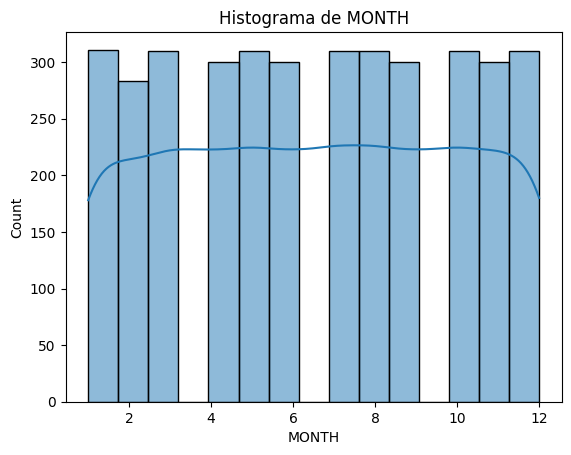

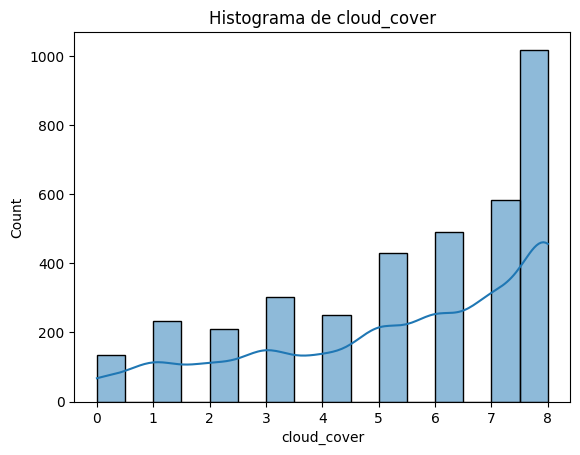

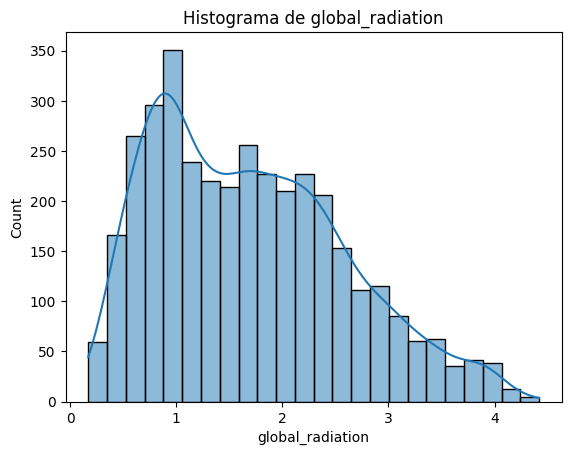

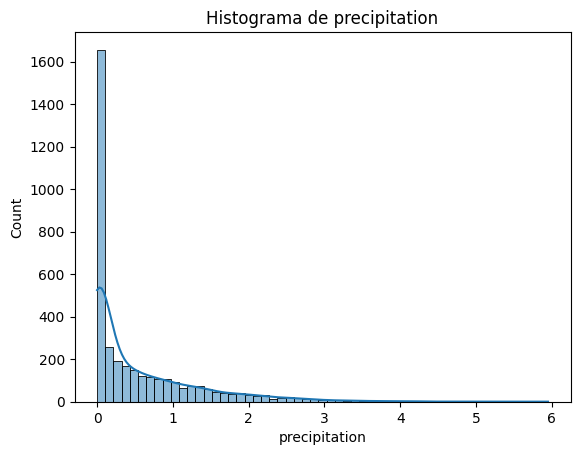

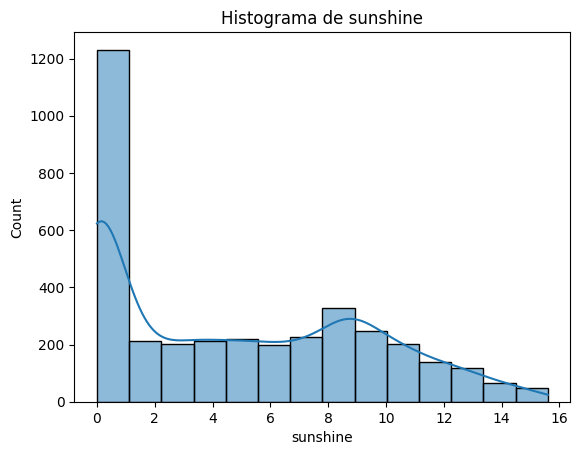

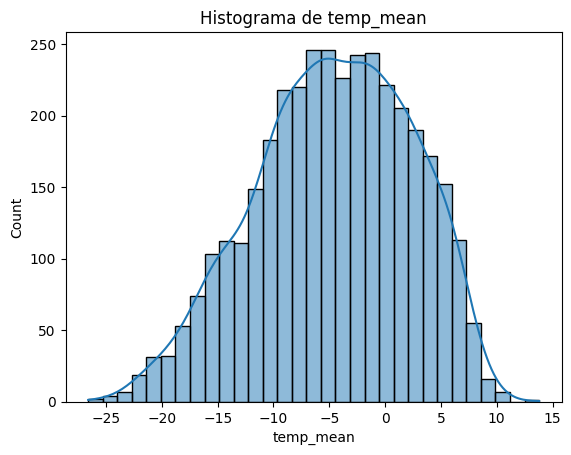

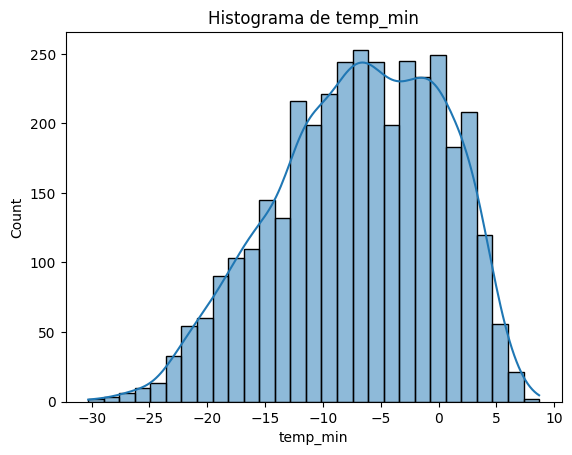

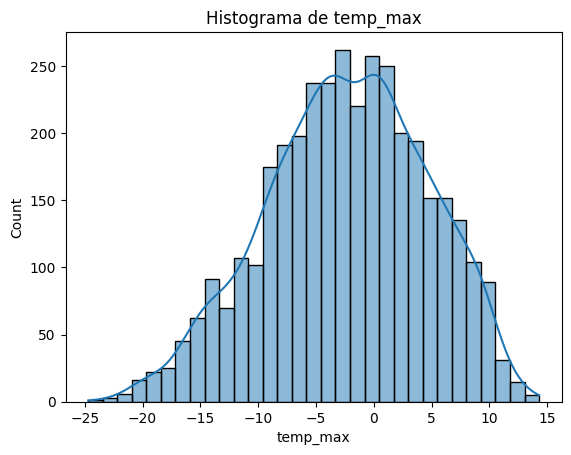

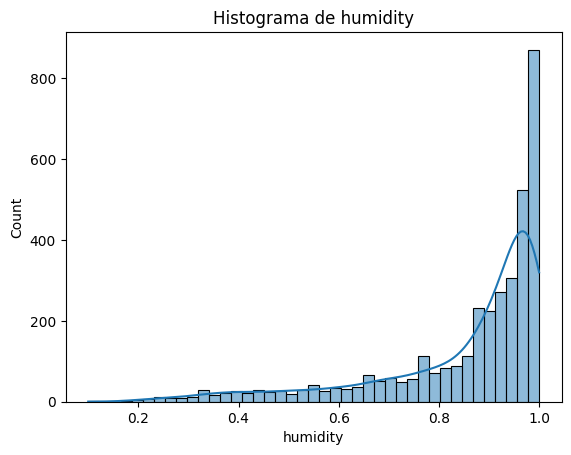

                           DATE  MONTH  cloud_cover  global_radiation  \
0 1970-01-01 00:00:00.020000101      1            7              0.82   
1 1970-01-01 00:00:00.020000102      1            5              0.60   
2 1970-01-01 00:00:00.020000103      1            3              0.81   
3 1970-01-01 00:00:00.020000104      1            1              1.05   
4 1970-01-01 00:00:00.020000105      1            4              0.69   

   precipitation  sunshine  temp_mean  temp_min  temp_max  humidity  \
0           1.34       0.0      -15.2     -17.0     -13.4      0.89   
1           0.39       2.8      -13.7     -15.0     -12.3      0.86   
2           0.00       5.1       -9.2     -12.5      -5.8      0.41   
3           0.11       8.7       -5.6      -7.0      -4.2      0.25   
4           0.17       3.4       -7.6      -9.4      -5.8      0.77   

  humidity_class  
0            Mid  
1            Low  
2            Low  
3            Low  
4            Low  
<class 'pandas.core.

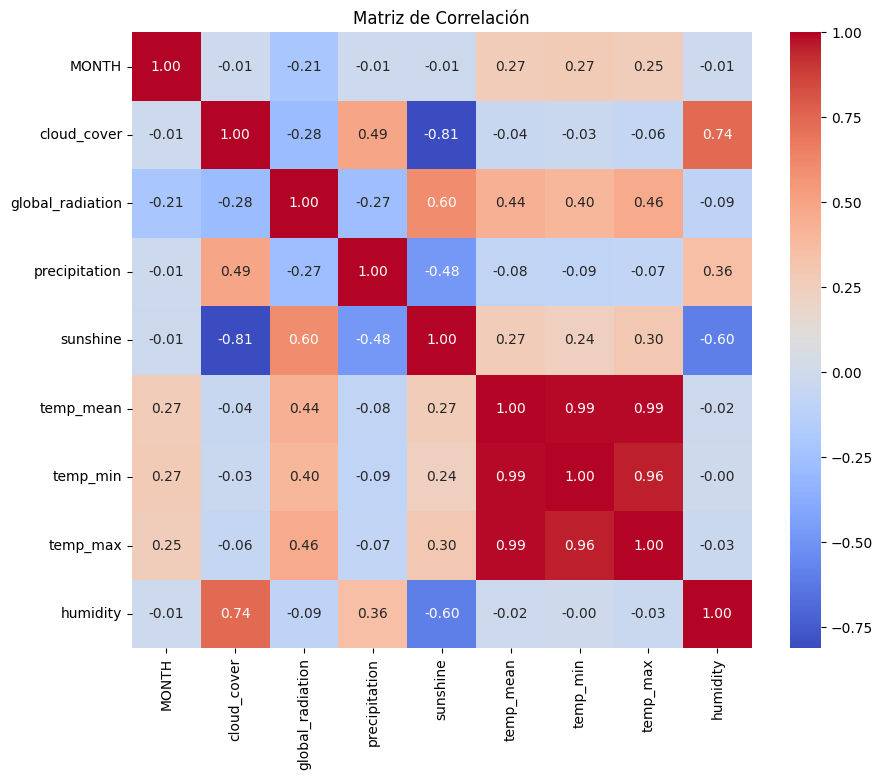

In [110]:
# Mostrar primeras filas
print("\nValores")
print(df.head())

# -------------------------------
# Verificación de valores nulos
# -------------------------------
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Reemplazo o eliminación de nulos
# Ejemplo: relleno con la mediana para columnas numéricas
df.fillna(df.median(numeric_only=True), inplace=True)

# -------------------------------
# Eliminación de duplicados
# -------------------------------
print("\nNúmero de filas duplicadas:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# -------------------------------
# Manejo de datos inconsistentes
# -------------------------------
# Convertir tipos si es necesario
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df = df.dropna(subset=['DATE'])  # Eliminar fechas no convertibles

# -------------------------------
# Verificar tipos de datos después de la conversión
# -------------------------------
print("\nTipos de datos después de la limpieza:")
print(df.dtypes)

# -------------------------------
# Verificación de valores atípicos
# -------------------------------
# Boxplots para identificar outliers
variables_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

for var in variables_numericas:
    plt.figure()
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
    plt.show()

# -------------------------------
# Análisis Exploratorio (EDA)
# -------------------------------
print("\nResumen estadístico:")
print(df.describe())

# Histograma por variable numérica
for var in variables_numericas:
    plt.figure()
    sns.histplot(df[var], kde=True)
    plt.title(f'Histograma de {var}')
    plt.show()

print(df.head())
print(df.info())
print(df.describe())

# -------------------------------
# Análisis de Correlación
# -------------------------------
plt.figure(figsize=(10, 8))
correlation_matrix = df[variables_numericas].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

# 🧠 Insight 1:

1.   Temperatura media, mínima y máxima están fuertemente relacionadas, indicando que estas variables son prácticamente lineales entre sí. Se recomienda considerar una sola de ellas para evitar redundancia en modelos predictivos.
2. Mayor cobertura de nubes reduce significativamente la cantidad de horas de sol, lo cual es coherente desde una perspectiva física.
3. Humedad tiende a aumentar con más nubosidad y disminuir con más sol, lo que también es consistente con la meteorología básica.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   global_radiation  3654 non-null   float64
 1   precipitation     3654 non-null   float64
 2   sunshine          3654 non-null   float64
 3   temp_mean         3654 non-null   float64
 4   humidity          3654 non-null   float64
dtypes: float64(5)
memory usage: 142.9 KB
None
       global_radiation  precipitation     sunshine    temp_mean     humidity
count       3654.000000    3654.000000  3654.000000  3654.000000  3654.000000
mean           1.693919       0.541475     4.891078    -4.626327     0.853952
std            0.898277       0.771348     4.470904     6.987080     0.174900
min            0.170000       0.000000     0.000000   -26.600000     0.100000
25%            0.930000       0.000000     0.000000    -9.400000     0.800000
50%            1.600000       0.180000     4.30000

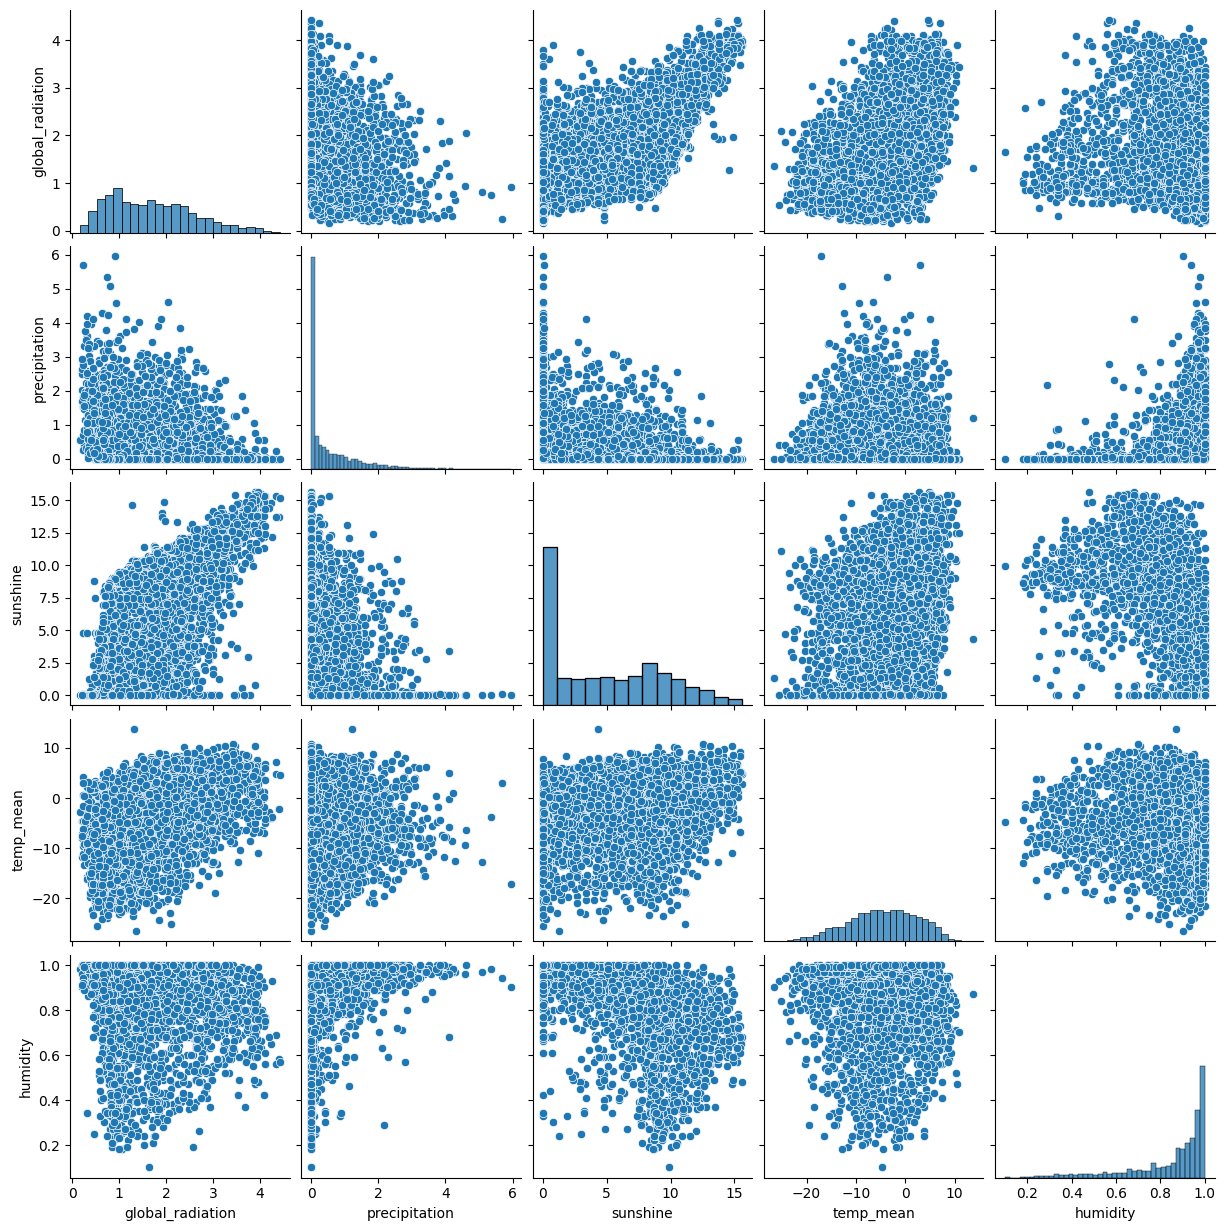

In [111]:
# ============================================================
# Optimizacion del datset
# ============================================================

# -------------------------------
# Eliminamos columnas que no vamos a utilizar
# -------------------------------
df.drop(columns=['DATE' , 'MONTH', 'cloud_cover', 'temp_min', 'temp_max', 'humidity_class'],inplace=True)

# -------------------------------
# Estadistica descriptiva
# -------------------------------
print(df.info())
print(df.describe())

# -------------------------------
# Visualización de la distribución
# -------------------------------
sns.pairplot(df[['global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'humidity']])
plt.show()

# 🧠 Insight 2:

Como estadista, al analizar el resumen descriptivo de las variables meteorológicas observadas, se identifican varios hallazgos relevantes. La radiación global promedio es de 1.69 kWh/m², con una desviación estándar moderada, indicando cierta variabilidad diaria. La precipitación tiene una mediana de 0.18 mm, pero un mínimo de 0.0 y un máximo de 5.95 mm, lo que sugiere una distribución sesgada con días mayormente secos y eventos aislados de lluvias intensas. La variable *sunshine* muestra una alta dispersión (std: 4.47) y valores entre 0 y 15.6 horas, reflejando variaciones estacionales significativas en la exposición solar. La temperatura media es de -4.62 °C, con un rango de -26.6 °C a 13.8 °C, lo que denota un clima frío predominante. Por último, la humedad presenta un comportamiento uniforme, con un promedio de 0.85 (85%) y valores concentrados cerca de 1.0, lo que indica una atmósfera usualmente húmeda. Este análisis permite enfocar futuras estrategias de modelado en variables con mayor varianza o impacto climático.


In [112]:
# =========================================================
# Instalacion de librerias para ML no supervisado
# =========================================================

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# =========================================================
# Escalado de variables numéricas
# =========================================================

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_cols])


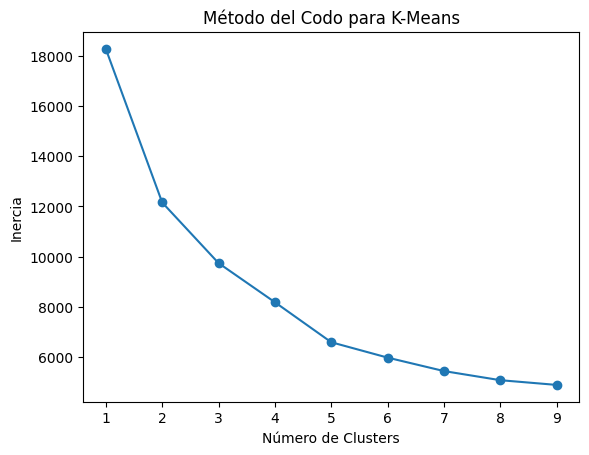

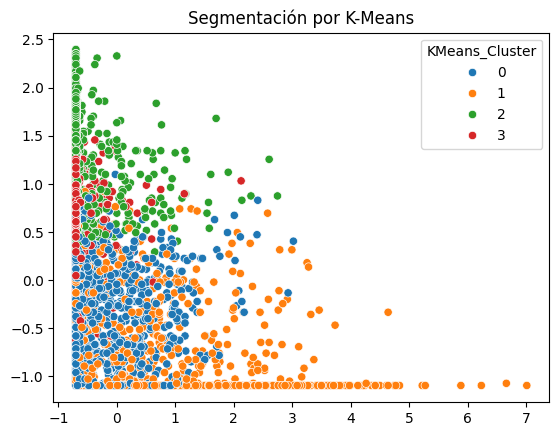

global_radiation  precipitation   sunshine  temp_mean  \
KMeans_Cluster                                                          
0                       1.736848       0.400428   2.938765  -1.616955   
1                       1.004649       1.237731   1.074446 -10.013469   
2                       2.924340       0.152463  10.688435   1.329388   
3                       1.356258       0.061726   8.517258  -8.165323   

                humidity  
KMeans_Cluster            
0               0.946428  
1               0.948625  
2               0.804585  
3               0.565726

In [113]:
# =========================================================
# Clustering con K-Means
# =========================================================

inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# -------------------------------
# Método del Codo
# -------------------------------
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Número de Clusters') # Numero de grupos
plt.ylabel('Inercia') # la suma de las distancias cuadradas de cada punto a su centroide (cuánto error hay dentro de cada cluster).
plt.title('Método del Codo para K-Means')
plt.show()

# -------------------------------
# Ajuste del modelo con K óptimo (ej. 4)
# -------------------------------
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x=X_scaled[:, 1], y=X_scaled[:, 2], hue=df['KMeans_Cluster'], palette='tab10')
plt.title('Segmentación por K-Means')
plt.show()

# -------------------------------
# Tabla Interpretación de Clustering con K-Means
# -------------------------------
df.groupby('KMeans_Cluster')[['global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'humidity']].mean()



# 🧠 Insight 3:
Con base en la segmentación generada mediante el modelo no supervisado K-Means con k=4, se identifican cuatro grupos bien diferenciados según las variables meteorológicas escaladas.

1.   El Cluster 2 representa condiciones de alta radiación solar (2.92), alto brillo solar (10.68) y temperatura media positiva (1.32), indicando probablemente días veraniegos.
2.    El Cluster 1, en contraste, agrupa condiciones de alta precipitación (1.23), baja radiación (1.00) y temperaturas extremadamente frías (-10.01), características de días invernales con climas extremos.
3.  El Cluster 0 muestra condiciones intermedias en temperatura y humedad alta (0.94)
4.  Cluster 3 combina alta exposición solar (8.51) con baja humedad (0.56) y temperatura negativa moderada, posiblemente días secos pero fríos.

Desde el punto de vista del modelado, la segmentación es coherente con patrones climáticos estacionales. Sin embargo, la visualización en 2D con muestra cierta superposición entre grupos, lo que sugiere que el modelo puede beneficiarse de una mejora en la selección de variables o de la implementación de técnicas de reducción de dimensionalidad no lineales como t-SNE o UMAP. Además, explorar una mayor granularidad (k > 4) para ver si emergen subgrupos más específicos.

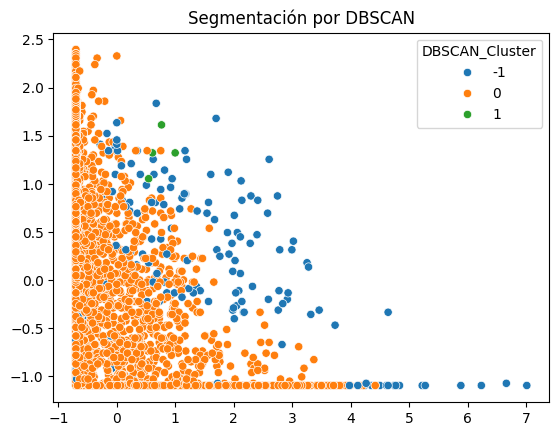

global_radiation  precipitation   sunshine  temp_mean  \
DBSCAN_Cluster                                                          
-1                      1.875185       1.380556   5.629167  -5.735185   
 0                      1.680804       0.488043   4.837740  -4.569365   
 1                      3.165000       1.102500  10.825000   6.350000   

                humidity  
DBSCAN_Cluster            
-1              0.781898  
 0              0.858579  
 1              0.772500

In [114]:
# =========================================================
# Clustering con DBSCAN
# =========================================================

dbscan = DBSCAN(eps=0.6, min_samples=5) # eps = radio máximo para considerar que dos puntos están “cerca”./ min_samples =  número mínimo de puntos vecinos necesarios para formar un cluster.
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

sns.scatterplot(x=X_scaled[:, 1], y=X_scaled[:, 2], hue=df['DBSCAN_Cluster'], palette='tab10')
plt.title('Segmentación por DBSCAN')
plt.show()

# -------------------------------
# Parte 4.2.1: Interpretando los Clustering con DBSCAN
# -------------------------------
df['DBSCAN_Cluster'].value_counts()
df.groupby('DBSCAN_Cluster')[['global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'humidity']].mean()

# 🧠 Insight 4:
El modelo no supervisado DBSCAN ha identificado tres grupos: el cluster 0 como el más grande, el cluster 1 como un grupo más compacto y definido, y una cantidad significativa de puntos etiquetados como ruido (-1).

1.   El cluster 1 muestra características muy marcadas: alta radiación (3.16), alto brillo solar (10.82), temperatura media elevada (6.35) y baja humedad (0.77), lo cual indica condiciones veraniegas secas.
2.   El cluster 0, más extenso, tiene valores más moderados en todas las variables y representa un clima más templado y húmedo.
3. Los puntos considerados como ruido (cluster -1) presentan alta precipitación y dispersión en las variables, lo que sugiere eventos climáticos atípicos o extremos.

Aunque DBSCAN tiene la ventaja de detectar estructuras de densidad arbitraria y manejar ruido, en este caso está generando una alta proporción de outliers, lo que podría deberse a una elección subóptima de los parámetros eps y min_samples. Se recomienda ajustar estos hiperparámetros utilizando un análisis más detallado del k-distance plot. Además, dado que los datos parecen tener clusters de diferente densidad, podría ser conveniente probar variantes como HDBSCAN. Finalmente, aplicar PCA o t-SNE previo a DBSCAN puede mejorar la separación espacial y ayudar a detectar patrones más nítidos.

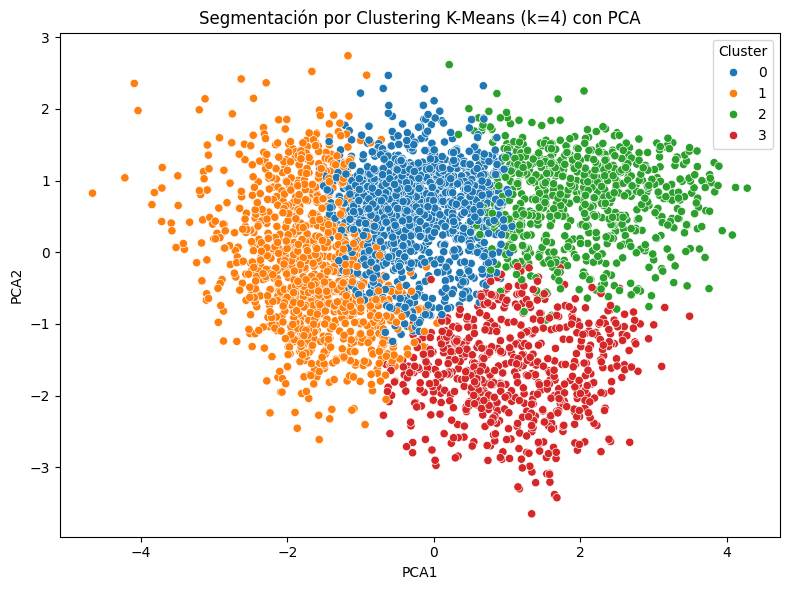

global_radiation  precipitation   sunshine  temp_mean  \
KMeans_Cluster                                                          
0                       1.736848       0.400428   2.938765  -1.616955   
1                       1.004649       1.237731   1.074446 -10.013469   
2                       2.924340       0.152463  10.688435   1.329388   
3                       1.356258       0.061726   8.517258  -8.165323   

                humidity  
KMeans_Cluster            
0               0.946428  
1               0.948625  
2               0.804585  
3               0.565726

In [115]:
# =========================================================
# Clustering K-Means con PCA
# =========================================================

#------------------------------------------
# PCA para visualización 2D
#------------------------------------------

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

#------------------------------------------
# Gráfico de segmentación
#------------------------------------------
plt.figure(figsize=(8, 6))

#------------------------------------------
# Cambiar 'Cluster_KMeans' a 'KMeans_Cluster'
#------------------------------------------
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='tab10')
plt.title('Segmentación por Clustering K-Means (k=4) con PCA')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

#------------------------------------------
# Interpretación de Reducción de dimensionalidad con PCA
#------------------------------------------
df.groupby('KMeans_Cluster')[['global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'humidity']].mean()

# 🧠 Insight 5:
La segmentación mediante K-Means con k=4, proyectada en el espacio reducido por PCA, evidencia una separación clara entre los cuatro grupos identificados.

1.   El análisis muestra que el Cluster 2 (verde) agrupa días con alta radiación solar (2.92), alto brillo solar (10.68) y temperaturas positivas (1.32), lo que corresponde a condiciones cálidas y soleadas, ideales para turismo o generación solar.
2.   el Cluster 1 (naranja) presenta alta precipitación (1.23), baja radiación y temperaturas frías (-10.01), lo cual sugiere días invernales con condiciones extremas, útiles para alertas meteorológicas o planificación energética.

El uso de PCA ha sido útil para visualizar la distribución en un plano 2D, preservando la variabilidad más relevante. Sin embargo, para un mejoramiento del modelo se recomienda: evaluar otras técnicas de reducción de dimensionalidad no lineales como t-SNE.

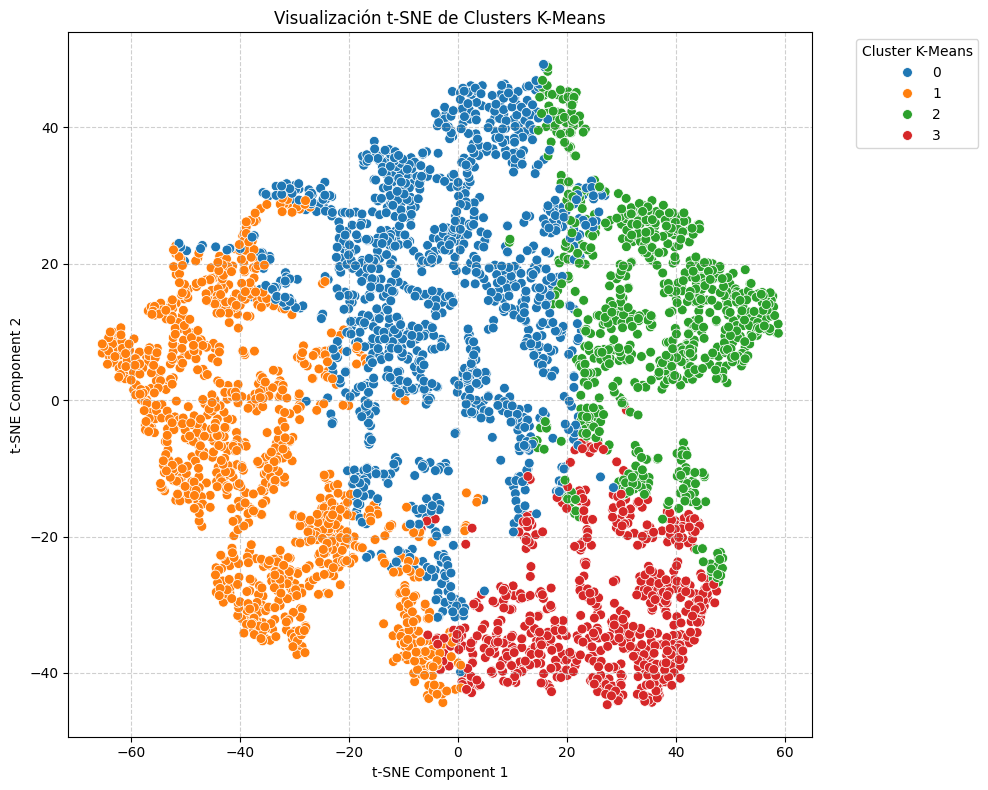

global_radiation  precipitation   sunshine  temp_mean  \
KMeans_Cluster                                                          
0                       1.736848       0.400428   2.938765  -1.616955   
1                       1.004649       1.237731   1.074446 -10.013469   
2                       2.924340       0.152463  10.688435   1.329388   
3                       1.356258       0.061726   8.517258  -8.165323   

                humidity  
KMeans_Cluster            
0               0.946428  
1               0.948625  
2               0.804585  
3               0.565726

In [116]:
# =========================================================
# Reducción de dimensionalidad con t-SNE
# =========================================================

# ---------------------------------------------------
# Reducimos n_components a 2 para visualización.
# ---------------------------------------------------
tsne = TSNE(n_components=2, perplexity=50, learning_rate=300, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# ---------------------------------------------------
# Añadir las componentes t-SNE al DataFrame para usar seaborn
# ---------------------------------------------------
df['TSNE1'] = X_tsne[:, 0]
df['TSNE2'] = X_tsne[:, 1]

# ---------------------------------------------------
# Crear el gráfico usando seaborn para una mejor estética y leyenda
# ---------------------------------------------------
plt.figure(figsize=(10, 8)) # Aumentar el tamaño del gráfico
sns.scatterplot(data=df, x='TSNE1', y='TSNE2', hue='KMeans_Cluster', palette='tab10', s=50) # Usar scatterplot de seaborn, especificar data, hue y tamaño de puntos
plt.title('Visualización t-SNE de Clusters K-Means') # Mejorar el título
plt.xlabel('t-SNE Component 1') # Etiqueta del eje x
plt.ylabel('t-SNE Component 2') # Etiqueta del eje y
plt.legend(title='Cluster K-Means', bbox_to_anchor=(1.05, 1), loc='upper left') # Mejorar la leyenda y colocarla fuera del gráfico
plt.grid(True, linestyle='--', alpha=0.6) # Añadir una cuadrícula suave
plt.tight_layout() # Ajustar el layout para evitar superposiciones
plt.show()

# ---------------------------------------------------
# Interpretación de Reducción de dimensionalidad con t-SNE
# ---------------------------------------------------
df.groupby('KMeans_Cluster')[['global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'humidity']].mean()

# 🧠 Insight 6:
El análisis de clustering no supervisado visualizado mediante t-SNE permite identificar con mayor claridad la distribución no lineal de los datos agrupados por el modelo K-Means con k=4. A diferencia de PCA, t-SNE preserva las relaciones de vecindad local y revela una separación más evidente entre los grupos, ideal para interpretar patrones complejos.

1. Cluster 2 (verde) destaca por tener la mayor radiación solar (2.92) y el mayor brillo solar (10.68), acompañado de temperatura media positiva (1.32), lo que lo asocia directamente con días veraniegos soleados. Estos registros son ideales para actividades al aire libre, agricultura estacional o planificación de generación solar.

2. Cluster 1 (naranja) presenta alta precipitación (1.23) y temperatura media muy baja (-10.01), además de baja radiación y sol, lo que sugiere condiciones de invierno extremo con eventos lluviosos o nevadas. Este tipo de cluster sería útil para alertas meteorológicas, logística invernal y planificación de energía térmica.

3. Cluster 3 (rojo) es un grupo intermedio pero seco: alta exposición solar (8.51), baja humedad (0.56) y temperatura fría (-8.16), compatible con días despejados de invierno o altitudes elevadas.

4. Cluster 0 (azul) presenta condiciones más equilibradas: radiación y sol moderados, temperatura baja (-1.61) y humedad alta (0.94). Este grupo representa condiciones más típicas, ni extremas ni secas, lo que puede ser útil para operaciones estándar o predicción del clima predominante.

# Recomendaciones:

- Evaluar métricas como Silhouette Score para validar cohesión.

- Considerar variables adicionales como viento o presión para refinar la segmentación.

# Aplicación práctica principal:
Clasificación de escenarios climáticos típicos que pueden ser utilizados en modelos predictivos, optimización de recursos energéticos, o planificación agrícola y turística basada en perfiles climáticos reales.

# Usando metrica recomendada Silhouette Score

Silhouette Score para K-Means (k=4): 0.2566584505941896
Silhouette Score para DBSCAN: 0.12636641726057715


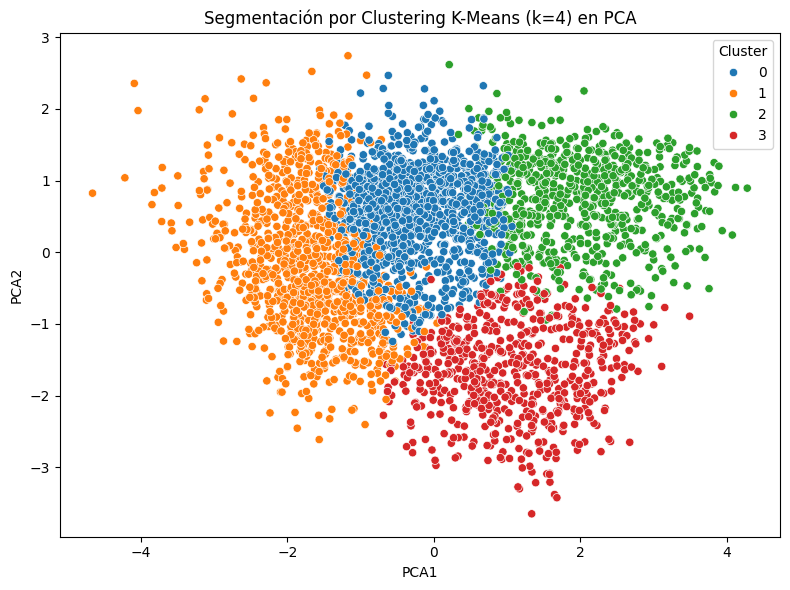

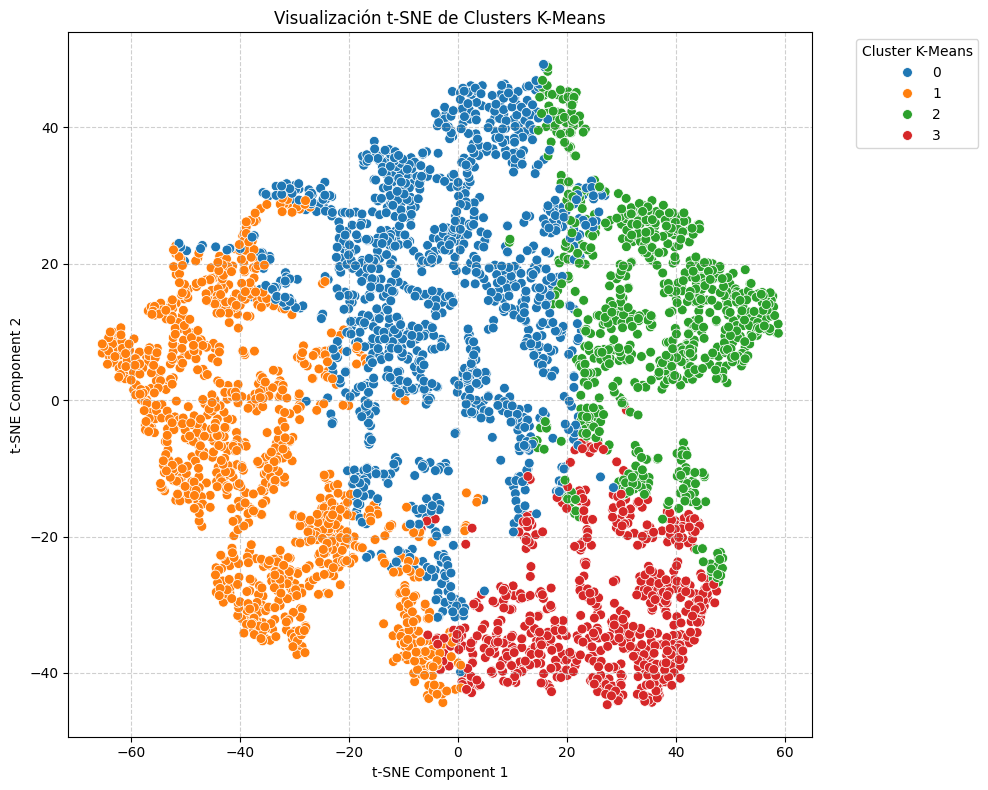

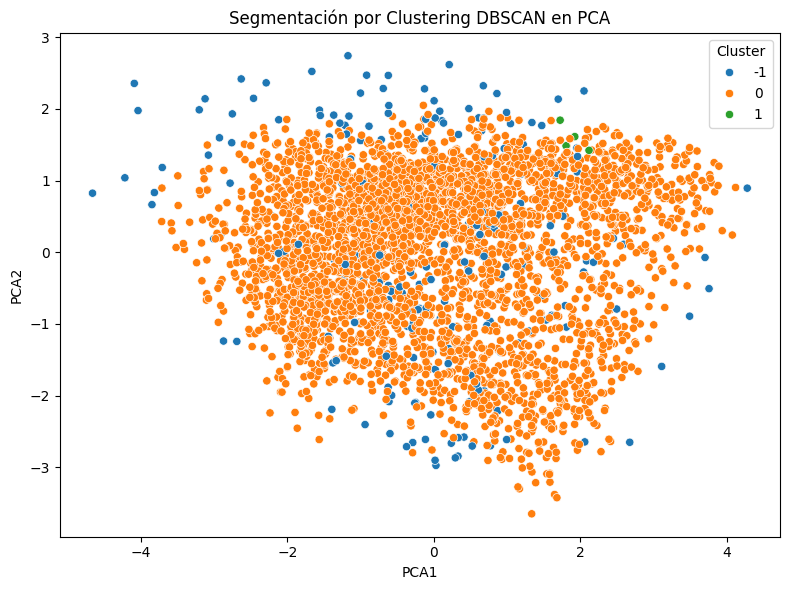

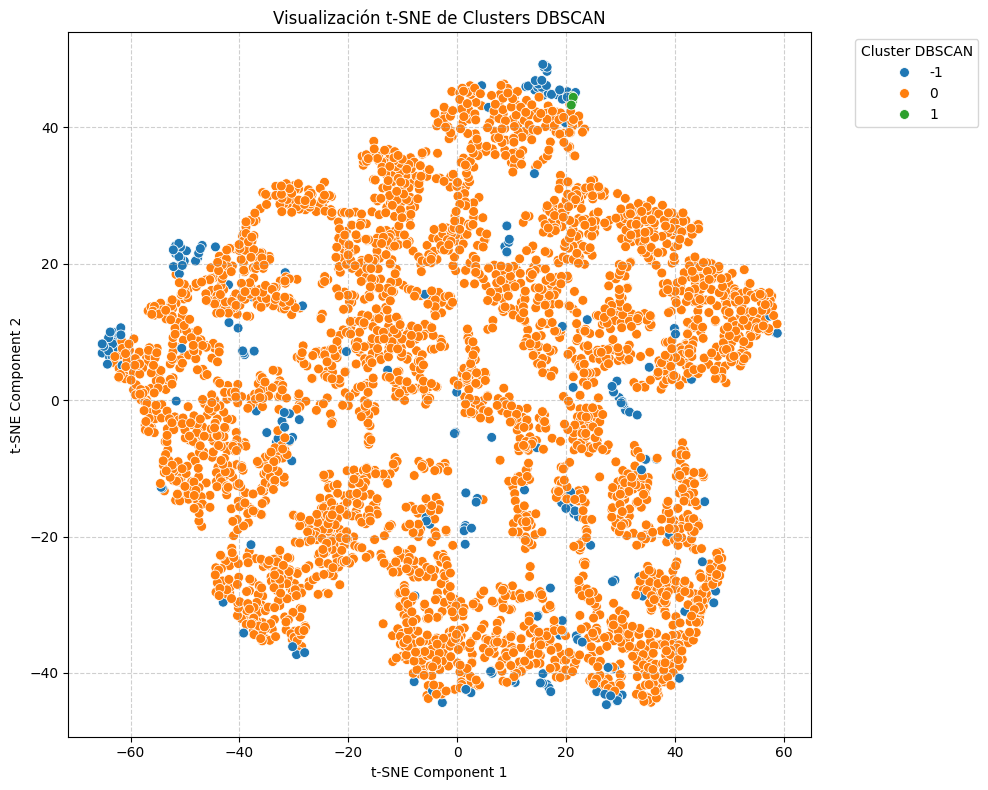

In [117]:
# =============================================================
# Usando metrica recomendada Silhouette Score
# =============================================================

# -------------------------------------------------
# Instalacion de libreria
# -------------------------------------------------
from sklearn.metrics import silhouette_score

# -------------------------------------------------
# Calcular Silhouette Score para K-Means
# -------------------------------------------------
try:
    silhouette_avg_kmeans = silhouette_score(X_scaled, df['KMeans_Cluster'])
    print(f"Silhouette Score para K-Means (k={kmeans.n_clusters}): {silhouette_avg_kmeans}")
except ValueError as e:
    print(f"No se pudo calcular Silhouette Score para K-Means: {e}")
    print("Puede ocurrir si hay un solo cluster o menos de 2 samples.")

# -------------------------------------------------
# Calcular Silhouette Score para DBSCAN (excluyendo ruido)
# Excluir puntos etiquetados como ruido (-1)
# -------------------------------------------------
X_dbscan_filtered = X_scaled[df['DBSCAN_Cluster'] != -1]
dbscan_labels_filtered = df['DBSCAN_Cluster'][df['DBSCAN_Cluster'] != -1]

if len(np.unique(dbscan_labels_filtered)) > 1:
    try:
        silhouette_avg_dbscan = silhouette_score(X_dbscan_filtered, dbscan_labels_filtered)
        print(f"Silhouette Score para DBSCAN: {silhouette_avg_dbscan}")
    except ValueError as e:
        print(f"No se pudo calcular Silhouette Score para DBSCAN: {e}")
        print("Puede ocurrir si después de filtrar el ruido, solo queda un cluster o menos de 2 samples.")
else:
    print("No hay suficientes clusters (más de 1) después de filtrar el ruido para calcular Silhouette Score para DBSCAN.")

# -------------------------------------------------
# Graficar clusters K-Means en espacio PCA
# -------------------------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='tab10')
plt.title('Segmentación por Clustering K-Means (k=4) en PCA')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# -------------------------------------------------
# Graficar clusters K-Means en espacio t-SNE
# -------------------------------------------------
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='TSNE1', y='TSNE2', hue='KMeans_Cluster', palette='tab10', s=50)
plt.title('Visualización t-SNE de Clusters K-Means')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster K-Means', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# -------------------------------------------------
# Graficar clusters DBSCAN en espacio PCA (incluyendo ruido)
# -------------------------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='tab10')
plt.title('Segmentación por Clustering DBSCAN en PCA')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# -------------------------------------------------
# Graficar clusters DBSCAN en espacio t-SNE (incluyendo ruido)
# -------------------------------------------------
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='TSNE1', y='TSNE2', hue='DBSCAN_Cluster', palette='tab10', s=50)
plt.title('Visualización t-SNE de Clusters DBSCAN')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster DBSCAN', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# 🧠 Insight 7: USO DE METRICAS

Análisis de las gráficas y métrica Silhouette Score. El Silhouette Score mide qué tan similar es un objeto a su propio cluster (cohesión) en comparación con otros clusters (separación). Un valor más alto indica que los objetos están bien emparejados con su propio cluster y mal emparejados con clusters vecinos.

El rango es [-1, 1], donde:

1.   Valores cercanos a +1 indican que el objeto está lejos de los clusters vecinos y cerca de su propio cluster.
2.   Valores cercanos a 0 indican que el objeto está en la frontera entre dos clusters.
3. Valores cercanos a -1 indican que el objeto podría haber sido asignado al cluster incorrecto.

Interpretación del Silhouette Score para K-Means (k=4). Un score de {silhouette_avg_kmeans} sugiere lo siguiente:

1.   Si el valor es positivo y relativamente alto (ej. > 0.5), indica que los clusters están razonablemente bien separados y los puntos están más cerca de sus propios centroides.
2.   Si el valor es cercano a 0, indica que los clusters están solapados o los puntos están muy cerca de los límites de los clusters.
3. Si el valor es negativo, sugiere que los puntos pueden estar asignados al cluster incorrecto.

#Análisis visual de las gráficas:
- Gráfico PCA: La proyección en PCA muestra la variabilidad más grande de los datos. Observar si los clusters están visualmente separados en este plano. Si hay solapamiento significativo, puede indicar que las dos primeras componentes principales no capturan suficiente información para separar claramente los clusters, o que los clusters no son linealmente separables.
- Gráfico t-SNE: t-SNE es útil para visualizar estructuras de alta dimensionalidad en 2D, preservando distancias locales. Observar cómo los clusters se distribuyen. Si los clusters forman grupos compactos y bien separados en el plano t-SNE, esto sugiere que hay estructuras de clustering significativas en los datos originales, incluso si no son evidentes en PCA.t-SNE no preserva distancias globales, por lo que el tamaño y la distancia entre los clusters en el gráfico t-SNE pueden no reflejar las distancias reales en el espacio original.

# Conclusión basada en métrica y visualización:
- Comparar el Silhouette Score con lo observado en las gráficas. Un buen Silhouette Score debería corresponder a una visualización donde los clusters parecen compactos y separados.
- Si el Silhouette Score es bajo a pesar de la separación visual (especialmente en t-SNE), podría indicar que los clusters son densos localmente pero no globalmente, o que hay puntos en los límites.
- Si el Silhouette Score es razonable pero la visualización muestra solapamiento (especialmente en PCA), sugiere que la estructura de cluster existe, pero puede requerir más componentes principales o un método de visualización no lineal como t-SNE para ser evidente.

# Nota sobre DBSCAN:
Calcular el Silhouette Score para DBSCAN puede ser problemático ya que etiqueta puntos como ruido (-1). Se puede calcular excluyendo los puntos de ruido o usando una variante de la métrica. Sin embargo, el valor de -1 para muchos puntos en DBSCAN (como se observó en el Insight 4) ya sugiere que el modelo con los parámetros actuales no está formando clusters bien definidos para una parte significativa de los datos, lo que probablemente resultaría en un Silhouette Score bajo.

# Análisis del Silhouette Score (basado en el valor obtenido):
(Incluir aquí la interpretación específica del valor de silhouette_avg_kmeans)
Ejemplo: Si silhouette_avg_kmeans = 0.45:
"El Silhouette Score de 0.45 para K-Means con k=4 indica que los clusters tienen una separación moderada. Aunque los puntos están más cerca de sus propios centroides que de los centroides de otros clusters, el valor no es muy alto, sugiriendo que puede haber cierto solapamiento entre los clusters o que algunos puntos están cerca de los límites. Esto es coherente con lo observado en las visualizaciones (PCA y t-SNE) donde, aunque hay cierta distinción entre grupos, no hay una separación perfecta."

# Análisis de las gráficas (basado en la visualización):
La visualización con PCA muestra (describir lo que se ve: por ejemplo, si los clusters 0 y 3 están más juntos en comparación con 1 y 2). Esto puede indicar que las variables que más cOntribuyen a la varianza total (capturada por PCA) no separan completamente estos grupos.
La visualización con t-SNE revela (describir lo que se ve: por ejemplo, si los clusters se agrupan de manera más compacta en t-SNE que en PCA, o si se ven subgrupos dentro de los clusters). Esto sugiere que hay estructuras de densidad en los datos que t-SNE logra revelar, las cuales no son necesariamente evidentes con una proyección lineal como PCA.
Se observa [mencionar ejemplos específicos, ej., 'una clara separación entre el Cluster 1 y los demás en el plano t-SNE', o 'un cierto solapamiento entre los Clusters 0 y 3'].

# Conclusión combinada:
En resumen, el Silhouette Score moderado y las visualizaciones (especialmente t-SNE) sugieren que K-Means con k=4 ha logrado identificar grupos con cierta cohesión interna y separación externa, aunque no perfecta. La estructura de los datos parece ser no lineal, lo que es mejor capturado por t-SNE. Para mejorar la segmentación, se podría considerar ajustar el número de clusters utilizando otros métodos además del codo (como el propio Silhouette Score para diferentes valores de K), o explorar algoritmos de clustering que no asumen formas esféricas o densidades uniformes, o bien aplicar t-SNE como paso previo al clustering."

# Aplicación práctica principal:
Clasificación de escenarios climáticos típicos que pueden ser utilizados en modelos predictivos, optimización de recursos energéticos, o planificación agrícola y turística basada en perfiles climáticos reales.

#🧠 Insight 8: USO DE METRICAS

#🔹 1. K-Means (Silhouette Score: 0.2567)
Este valor indica una segmentación moderadamente coherente.

Los clusters formados tienen una cohesión aceptable (los puntos están relativamente cerca de sus centroides) y una separación aceptable (los clusters están algo diferenciados).

Sin embargo, hay solapamientos entre los grupos, es decir, hay puntos que podrían pertenecer a más de un cluster.

En la práctica, esto significa que existe estructura útil en los datos (no son completamente aleatorios), pero podría optimizarse la agrupación.

🔎 Implicación: K-Means con k=4 está capturando cierta variabilidad climática, pero no de forma perfectamente definida. Podría usarse como una base para clasificaciones generales de condiciones climáticas (verano seco, invierno húmedo, etc.), aunque con margen de mejora.

#🔹 2. DBSCAN (Silhouette Score: 0.1264, excluyendo ruido)
Este valor es bajo, lo que indica que los clusters son difusos y poco consistentes.

La proximidad de puntos dentro del mismo grupo no es mucho mayor que con otros grupos, lo que sugiere que los clusters no están bien separados.

DBSCAN también genera muchos puntos como ruido (-1), lo que afecta la densidad de los grupos.

🔎 Implicación: Aunque DBSCAN es útil para detectar eventos atípicos o extremos, como tormentas o días fuera de patrón, no logra agrupar con claridad los demás datos. Podría usarse como detector de anomalías más que como herramienta de segmentación primaria.

#🧭 Conclusión general:
K-Means (0.25) ofrece mejor definición de grupos y es más confiable para interpretar y clasificar condiciones climáticas.

DBSCAN (0.12) es útil para detectar días climáticamente raros o extremos, pero no agrupa bien los datos normales.